In [1]:
## Step 1: import libraries required to run Python code
import os
import re
import sys
import csv
import glob
import re
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
#os.chdir(r"C:\\Users\\firmi\\Downloads\\")

In [ ]:
df_filtered = pd.read_csv('/home/beetho/Downloads/test_scrap_results/all_parties.csv')  #first dabatase energy_database_output

In [5]:
len(df)

4462

In [4]:
df.drop_duplicates(inplace=True)

In [6]:
df.head(2)

,Titre,Année de publication,Texte intégral,Publication,Lieu de publication,Auteur,Éditeur,Date de publication,Sujet,Société / organisation,Parti
0,Quebec needs Bloc because Carney agrees with T...,2025,"Liberal Leader Mark Carney is ""openly hostile ...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ
1,Quebec needs the Bloc because Carney agrees wi...,2025,"Liberal Leader Mark Carney is ""openly hostile ...",The Montreal Gazette (Online); Montreal,Montreal,"Riga, Andy",Postmedia Network Inc.,"Apr 1, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ


In [7]:
df.rename(columns={'Année de publication' : 'Year'}, inplace=True)
df.rename(columns = {'Texte intégral' : 'Texte'}, inplace=True)
df.rename(columns = {'Identifier / keyword' : 'Keywords'}, inplace=True)
df.rename(columns = {'Lieu de publication' : 'Place'}, inplace=True)
df.rename(columns = {'Date de publication' : 'Date'}, inplace=True)
df.rename(columns = {'Société / organisation' : 'NAICS'}, inplace=True)
df.rename(columns = {'Éditeur' : 'Editeur'}, inplace=True)

In [8]:
df.shape

(4462, 11)

In [118]:
df.head(2)

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS
0,Poilievre promises he'll be 'respectful and fi...,2025.0,Conservative Leader Pierre Poilievre launched ...,"The Ottawa Citizen; Ottawa, Ont.","Ottawa, Ont.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN
1,Poilievre promises he'll be 'respectful and fi...,2025.0,OTTAWA . Conservative Leader Pierre Poilievre ...,"Calgary Herald; Calgary, Alta.","Calgary, Alta.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN


## Date column cleaning

In [9]:
import re
import os
import sys
import csv
import glob

# Define a regex pattern to match and extract the date components
date_pattern = r'(\w{3}) (\d{1,2}), (\d{4})'

# Function to convert matched date string to desired format
def convert_date(match):
    month = match.group(1)
    day = match.group(2)
    year = match.group(3)
    return f'{month} {day}, {year}'

# Apply regex pattern and conversion function to the 'Date' column
df['Dates'] = df['Date'].apply(lambda x: re.sub(date_pattern, convert_date, x) if pd.notnull(x) else pd.NaT)

# Convert the 'Date' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

In [10]:
# Short script to remove '\n' from the 'Texte' column
df['Texte'] = df['Texte'].str.replace('\n', ' ', regex=True)

In [121]:
df.head(2)

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Dates
0,Poilievre promises he'll be 'respectful and fi...,2025.0,Conservative Leader Pierre Poilievre launched ...,"The Ottawa Citizen; Ottawa, Ont.","Ottawa, Ont.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN,2025-03-24
1,Poilievre promises he'll be 'respectful and fi...,2025.0,OTTAWA . Conservative Leader Pierre Poilievre ...,"Calgary Herald; Calgary, Alta.","Calgary, Alta.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN,2025-03-24


In [11]:
df['Texte'] = df['Texte'].astype('string')  # Convert the column to string type

## Publication column cleaning

In [12]:
!pip install fuzzywuzzy python-Levenshtein

In [13]:
from fuzzywuzzy import fuzz, process
import pandas as pd
import numpy as np

# ... assuming df is already defined ...

df['Publication'] = df['Publication'].astype('string')  # Convert the column to string type

# True names
true_names = [
    "Calgary Herald",
    "Chronicle - Herald",
    "CTV News",
    "Edmonton Journal",
    "Financial Post",
    "Global News Toronto",
    "Kingston Whig - Standard",
    "Leader Post",
    "Montreal Gazette",
    "National Post",
    "New Brunswick Telegraph",
    "Northern Miner",
    "Star - Phoenix",
    "Sudbury Star",
    "Surrey Now-Leader",
    "Telegraph-Journal",
    "The Globe and Mail",
    "The Ottawa Citizen",
    "The Province",
    "The Vancouver Sun",
    "The Windsor Star",
    "Times - Colonist",
    "Toronto Star",
    "Windspeaker Edmonton",
    "Winnipeg Free Press"
]


def match_journal_name(name):
    """
    Function that finds the corresponding name in the list of true names using fuzzywuzzy.
    """
    # Check if the name is missing or NaN
    if pd.isnull(name) or name == '':
        return name

    # Use process.extractOne to get the most similar name from the true_names list.
    matched_name, score = process.extractOne(name, true_names)

    # If the score is greater than a certain threshold (e.g., 80), consider it a match.
    if score >= 80:
        return matched_name
    else:
        # Otherwise, return the original name.
        return name

# Apply the function to the "Publication" column of df1
df["Public"] = df["Publication"].apply(match_journal_name)


In [125]:
df.head(2)

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Dates,Public
0,Poilievre promises he'll be 'respectful and fi...,2025.0,Conservative Leader Pierre Poilievre launched ...,"The Ottawa Citizen; Ottawa, Ont.","Ottawa, Ont.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN,2025-03-24,The Ottawa Citizen
1,Poilievre promises he'll be 'respectful and fi...,2025.0,OTTAWA . Conservative Leader Pierre Poilievre ...,"Calgary Herald; Calgary, Alta.","Calgary, Alta.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN,2025-03-24,Calgary Herald


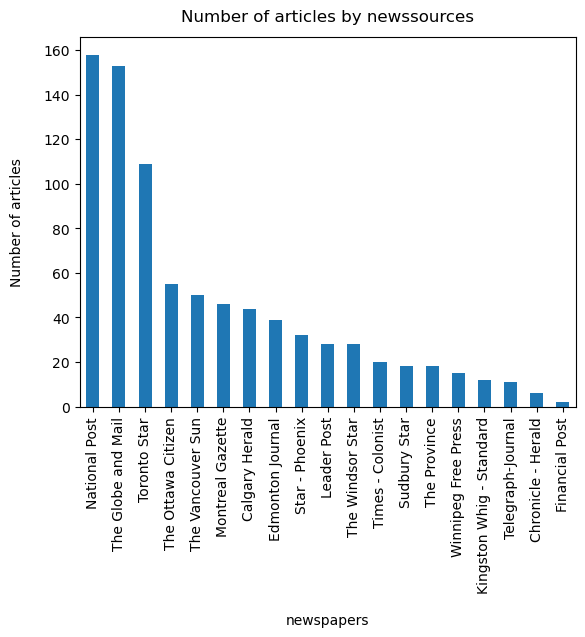

In [126]:
df['Public'].value_counts().plot(kind='bar');  # , color=c
plt.xlabel("newspapers", labelpad=14)
plt.ylabel("Number of articles", labelpad=14)
plt.title("Number of articles by newssources", y=1.02)
plt.show()

In [127]:
df['Public'].value_counts()

Public
National Post               158
The Globe and Mail          153
Toronto Star                109
The Ottawa Citizen           55
The Vancouver Sun            50
Montreal Gazette             46
Calgary Herald               44
Edmonton Journal             39
Star - Phoenix               32
Leader Post                  28
The Windsor Star             28
Times - Colonist             20
Sudbury Star                 18
The Province                 18
Winnipeg Free Press          15
Kingston Whig - Standard     12
Telegraph-Journal            11
Chronicle - Herald            6
Financial Post                2
Name: count, dtype: int64

In [128]:
df.head(2)

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Dates,Public
0,Poilievre promises he'll be 'respectful and fi...,2025.0,Conservative Leader Pierre Poilievre launched ...,"The Ottawa Citizen; Ottawa, Ont.","Ottawa, Ont.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN,2025-03-24,The Ottawa Citizen
1,Poilievre promises he'll be 'respectful and fi...,2025.0,OTTAWA . Conservative Leader Pierre Poilievre ...,"Calgary Herald; Calgary, Alta.","Calgary, Alta.","Taylor, Stephanie",Postmedia Network Inc.,"Mar 24, 2025",Trade disputes; Political campaigns; Canadians...,NaN,2025-03-24,Calgary Herald


In [14]:
# List of values to delete
values_to_delete = [
    "McCarthy Tétrault Blog: Québec Employer Advisor; Quebec",
    "Sunday Business; London (UK)",
    "Michael Geist [BLOG ]",
    "Politico, U.S. edition; Arlington",
    "Daimnation! [BLOG ]; Dartmouth",
    "Boursier.com; Paris",
    "China Daily, US ed.; New York, N.Y.",
    "City A.M.; London",
    "JTN Monthly; Osaka", "Global News Toronto", "Financial Post"
]

# Create a new DataFrame without the rows containing the specified values
df_filtered = df[~df['Public'].isin(values_to_delete)]

# If you want to modify the original DataFrame 'df', you can use the inplace parameter
# df.drop(df[df['Public'].isin(values_to_delete)].index, inplace=True)


In [15]:
df_filtered['Public'].value_counts()

Public
National Post               996
The Globe and Mail          921
Toronto Star                411
Montreal Gazette            278
Calgary Herald              268
Edmonton Journal            239
The Vancouver Sun           234
The Ottawa Citizen          202
Leader Post                 172
The Windsor Star            134
Star - Phoenix              126
Winnipeg Free Press          90
The Province                 82
Kingston Whig - Standard     82
Sudbury Star                 69
Times - Colonist             59
Telegraph-Journal            52
Chronicle - Herald           32
Name: count, dtype: int64

In [16]:
df_filtered['Public'] = df_filtered['Public'].astype('string')  # Convert the column to string type

In [17]:
df_filtered['Public'] = df_filtered['Public'].replace("Now; Surrey, B.C.", "Surrey Now-Leader")

In [18]:
df_filtered.shape

(4454, 13)

In [19]:
df_filtered.head()

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Parti,Dates,Public
0,Quebec needs Bloc because Carney agrees with T...,2025,"Liberal Leader Mark Carney is ""openly hostile ...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-02,Montreal Gazette
1,Quebec needs the Bloc because Carney agrees wi...,2025,"Liberal Leader Mark Carney is ""openly hostile ...",The Montreal Gazette (Online); Montreal,Montreal,"Riga, Andy",Postmedia Network Inc.,"Apr 1, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-01,Montreal Gazette
2,Why is the Bloc Québécois vote collapsing in Q...,2025,You can expect snickering and eye-rolling any ...,The Globe and Mail (Online); Toronto,Toronto,"Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail
3,"With Canada in danger, the Bloc Québécois vote...",2025,You can expect snickering and eye-rolling any ...,"The Globe and Mail; Toronto, Ont.","Toronto, Ont.","Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail
4,The Bloc's Awkward battle for Quebec; Leader Y...,2025,"As with so many other things, Donald Trump's a...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Bruemmer, Rene",Postmedia Network Inc.,"Mar 29, 2025",Political campaigns; Leadership; Elections; So...,Nom: Bloc Quebecois; NAICS: 813940,BQ,2025-03-29,Montreal Gazette


In [135]:
#export to csv
df_filtered.to_csv("/home/beetho/Downloads/test_scrap_results/PCC.csv", index=False, encoding='utf-8-sig') # "C:\\Users\\firmi\\Downloads\\energy_dataset_combine_2025_01_24 province, date, publication clean  tarifs_2025_02_08// usnews_2025_mar_05

In [136]:
## Combine with the last version
usnews_concat = pd.concat([df_filtered, pd.read_csv("C:\\Users\\firmi\\Downloads\\usnews_2025_mar_05.csv")], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\firmi\\Downloads\\usnews_2025_mar_05.csv'

In [ ]:
usnews_concat.shape

(6103, 12)

In [ ]:
usnews_concat.head()

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Dates,Public
0,How new U.S. tariffs could impact Ottawa's eco...,2025,As Canadians everywhere ice their necks from t...,The Ottawa Citizen (On line); Ottawa,Ottawa,NaN,Postmedia Network Inc.,"Mar 6, 2025",Canada-US relations; Trade disputes; Internati...,Nom: Conference Board of Canada; NAICS: 541720...,2025-03-06 00:00:00,The Ottawa Citizen
1,Canucks anthem singer says singing O Canada 'l...,2025,Ask Elizabeth Irving about singing national an...,The Province (Online); Vancouver,Vancouver,"Ewen, Steve",Postmedia Network Inc.,"Mar 6, 2025",National anthems; Singers; Professional hockey,NaN,2025-03-06 00:00:00,The Province
2,"'Very bumpy ride': CN Rail CEO talks tariffs, ...",2025,The head of one of Canada's largest railway co...,Calgary Herald (Online); Calgary,Calgary,"Wilhelm, Steven",Postmedia Network Inc.,"Mar 6, 2025",Canada-US relations; Mineral reserves; Interna...,NaN,2025-03-06 00:00:00,Calgary Herald
3,Roughriders add 6-foot-2 American receiver,2025,The Saskatchewan Roughriders have added anothe...,The Leader Post (Online); Regina,Regina,Taylor Shire,Postmedia Network Inc.,"Mar 6, 2025",College football,Nom: National Football League--NFL; NAICS: 711...,2025-03-06 00:00:00,Leader Post
4,Why a neutral-site clash with the Minnesota Fr...,2025,Like their brothers with the Senators and 67's...,The Ottawa Citizen (Online); Ottawa,Ottawa,NaN,Postmedia Network Inc.,"Mar 6, 2025",Professional hockey,NaN,2025-03-06 00:00:00,The Ottawa Citizen


In [ ]:
# https://medium.com/mapegy-tech/large-scale-language-models-for-innovation-and-technology-intelligence-sentiment-analysis-on-news-2c1ed1f6f2ad
# https://stackoverflow.com/questions/68127754/removal-of-stop-words-and-stemming-lemmatization-for-bertopic
# ECB com with AI. https://ies.fsv.cuni.cz/sites/default/files/uploads/files/wp_2023_29_fanta%2C%20horvath.pdf

In [ ]:
usnews_concat.to_csv( "C:\\Users\\firmi\\Downloads\\usnews_up_comb_2025_03_16.csv", index=False, encoding='utf-8-sig') # "C:\\Users\\firmi\\Downloads\\energy_dataset_combine_2025_01_24 province, date, publication clean

In [ ]:
## LLMS and word2vec code on google collab: https://aiforhumanists.com/tutorials/

In [21]:
df_filtered.head()

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Parti,Dates,Public
0,Quebec needs Bloc because Carney agrees with T...,2025,"Liberal Leader Mark Carney is ""openly hostile ...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-02,Montreal Gazette
1,Quebec needs the Bloc because Carney agrees wi...,2025,"Liberal Leader Mark Carney is ""openly hostile ...",The Montreal Gazette (Online); Montreal,Montreal,"Riga, Andy",Postmedia Network Inc.,"Apr 1, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-01,Montreal Gazette
2,Why is the Bloc Québécois vote collapsing in Q...,2025,You can expect snickering and eye-rolling any ...,The Globe and Mail (Online); Toronto,Toronto,"Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail
3,"With Canada in danger, the Bloc Québécois vote...",2025,You can expect snickering and eye-rolling any ...,"The Globe and Mail; Toronto, Ont.","Toronto, Ont.","Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail
4,The Bloc's Awkward battle for Quebec; Leader Y...,2025,"As with so many other things, Donald Trump's a...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Bruemmer, Rene",Postmedia Network Inc.,"Mar 29, 2025",Political campaigns; Leadership; Elections; So...,Nom: Bloc Quebecois; NAICS: 813940,BQ,2025-03-29,Montreal Gazette


In [22]:
df_result = df_filtered

In [23]:
import pandas as pd
from datetime import datetime, timedelta
import re
import unicodedata

In [24]:
date_column = "Dates"
df_result[date_column].fillna(method='ffill', inplace=True)
    
# Convert the date column to datetime type if it's not already
if not pd.api.types.is_datetime64_any_dtype(df_result[date_column]):
    df_result[date_column] = pd.to_datetime(df_result[date_column])

# Function to find the date of Monday of the week
def find_monday(date):
    # weekday() returns 0 for Monday, 1 for Tuesday, etc.
    days_to_subtract = date.weekday()
    monday_date = date - timedelta(days=days_to_subtract)
    return monday_date.strftime('%Y-%m-%d')

# Create the Week column with the date of Monday of the week
df_result['Week'] = df_result[date_column].apply(find_monday)

# Create the Monthly column in 'YYYY-MM' format
df_result['Monthly'] = df_result[date_column].apply(
    lambda x: f"{x.year}-{x.month:02d}"
)

In [25]:
df_result.head()

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Parti,Dates,Public,Week,Monthly
0,Quebec needs Bloc because Carney agrees with T...,2025,"Liberal Leader Mark Carney is ""openly hostile ...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-02,Montreal Gazette,2025-03-31,2025-04
1,Quebec needs the Bloc because Carney agrees wi...,2025,"Liberal Leader Mark Carney is ""openly hostile ...",The Montreal Gazette (Online); Montreal,Montreal,"Riga, Andy",Postmedia Network Inc.,"Apr 1, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-01,Montreal Gazette,2025-03-31,2025-04
2,Why is the Bloc Québécois vote collapsing in Q...,2025,You can expect snickering and eye-rolling any ...,The Globe and Mail (Online); Toronto,Toronto,"Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail,2025-03-31,2025-04
3,"With Canada in danger, the Bloc Québécois vote...",2025,You can expect snickering and eye-rolling any ...,"The Globe and Mail; Toronto, Ont.","Toronto, Ont.","Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail,2025-03-31,2025-04
4,The Bloc's Awkward battle for Quebec; Leader Y...,2025,"As with so many other things, Donald Trump's a...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Bruemmer, Rene",Postmedia Network Inc.,"Mar 29, 2025",Political campaigns; Leadership; Elections; So...,Nom: Bloc Quebecois; NAICS: 813940,BQ,2025-03-29,Montreal Gazette,2025-03-24,2025-03


In [28]:
!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.2 MB/s eta 0:00:000:00:010:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
from fuzzywuzzy import fuzz, process
import html
import re
import pandas as pd
import textacy
import textacy.preprocessing as tprep
import spacy

nlp = spacy.load("en_core_web_sm")

def fix_journal_names(df):

    df['Publication'] = df['Publication'].astype('string') # Convert the column to string type

    # True names
    true_names = [
        "Calgary Herald",
        "Chronicle - Herald",
        "CTV News",
        "Edmonton Journal",
        "Financial Post",
        "Global News Toronto",
        "Kingston Whig - Standard",
        "Leader Post",
        "Montreal Gazette",
        "National Post",
        "New Brunswick Telegraph",
        "Northern Miner",
        "Star - Phoenix",
        "Sudbury Star",
        "Surrey Now-Leader",
        "Telegraph-Journal",
        "The Globe and Mail",
        "The Ottawa Citizen",
        "The Province",
        "The Vancouver Sun",
        "The Windsor Star",
        "Times - Colonist",
        "Toronto Star",
        "Windspeaker Edmonton",
        "Winnipeg Free Press"
    ]

    def match_journal_name(name):
        """
        Function that finds the corresponding name in the list of true names using fuzzywuzzy.
        """
        # Use process.extractOne to get the most similar name from the true_names list.
        matched_name, score = process.extractOne(name, true_names)

        # If the score is greater than a certain threshold (e.g., 80), consider it a match.
        if score >= 80:
            return matched_name
        else:
            # Otherwise, return the original name.
            return name

    # Apply the function to the "Publication" column of df1
    df["Public"] = df["Publication"].apply(match_journal_name)

    return df


def clean_build(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # remove words contains numbers
    text = re.sub('\w*\d\w*', '', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    
    text = text.strip()
    
    if textacy.__version__ < '0.11':
        # as in book
        text = tprep.normalize_hyphenated_words(text)
        text = tprep.normalize_quotation_marks(text)
        text = tprep.normalize_unicode(text)
        text = tprep.remove_accents(text)

    else:
        # adjusted to textacy 0.11
        text = tprep.normalize.hyphenated_words(text)
        text = tprep.normalize.quotation_marks(text)
        text = tprep.normalize.unicode(text)
        text = tprep.remove.accents(text)
    return text.strip()

def split_sentences(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]


def process_files(df):
    
    df.drop_duplicates(inplace=True)
    
    df.rename(columns={'Année de publication' : 'Year'}, inplace=True)
    df.rename(columns = {'Texte intégral' : 'Texte'}, inplace=True)
    df.rename(columns = {'Identifier / keyword' : 'Keywords'}, inplace=True)
    df.rename(columns = {'Lieu de publication' : 'Place'}, inplace=True)
    df.rename(columns = {'Date de publication' : 'Date'}, inplace=True)
    df.rename(columns = {'Société / organisation' : 'NAICS'}, inplace=True)
    df.rename(columns = {'Éditeur' : 'Editeur'}, inplace=True)
    
    # Define a regex pattern to match and extract the date components
    date_pattern = r'(\w{3}) (\d{1,2}), (\d{4})'

    # Function to convert matched date string to desired format
    def convert_date(match):
        month = match.group(1)
        day = match.group(2)
        year = match.group(3)
        return f'{month} {day}, {year}'

    # Apply regex pattern and conversion function to the 'Date' column
    df['Dates'] = df['Date'].apply(lambda x: re.sub(date_pattern, convert_date, x) if pd.notnull(x) else pd.NaT)

    # Convert the 'Date' column to datetime format
    df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')
    
    # Short script to remove '\n' from the 'Texte' column
    df['Texte'] = df['Texte'].str.replace('\n', ' ', regex=True).astype('string')
    
    df = fix_journal_names(df)
    
    values_to_delete = [
    "McCarthy Tétrault Blog: Québec Employer Advisor; Quebec",
    "Sunday Business; London (UK)",
    "Michael Geist [BLOG ]",
    "Politico, U.S. edition; Arlington",
    "Daimnation! [BLOG ]; Dartmouth",
    "Boursier.com; Paris",
    "China Daily, US ed.; New York, N.Y.",
    "City A.M.; London",
    "JTN Monthly; Osaka", "Global News Toronto", "Financial Post"
]

    # Create a new DataFrame without the rows containing the specified values
    df_filtered = df[~df['Public'].isin(values_to_delete)]
    
    df_filtered['Public'] = df_filtered['Public'].astype('string')  # Convert the column to string type
    
    df_filtered['Public'] = df_filtered['Public'].replace("Now; Surrey, B.C.", "Surrey Now-Leader")
    
    return df_filtered

In [37]:
import pandas as pd
import os


def process_each_file(df):
    
    df = df.copy()
    
    df.drop_duplicates(inplace=True)
    
    df["Texte"] = df["Texte"].fillna("")
    df["Texte"] = df["Texte"].astype(str)
    
    #df = process_files(df)
    
    df["Sentences"] = df["Texte"].apply(split_sentences)
    
    df.drop(columns=["Texte"], inplace=True)
    
    df = df.explode("Sentences", ignore_index=True)
    
    # Ensure there is no float in the "Sentences" column
    df.dropna(subset=["Sentences"], inplace=True)
    df["Sentences"] = df["Sentences"].astype(str)
    
    #df["Sentiment"], df["Tone"] = zip(*df["Sentences"].apply(get_sentiment))
    
    #df["Category"] = df["Sentences"].apply(get_category)
    
    return df

def merge_with_previous_version(new_df, file_name):
    final_data_path = f"data/final_data/{file_name}"
    
    if os.path.exists(final_data_path):
        # Charger l'ancienne version
        old_df = pd.read_csv(final_data_path)
        
        # Fusionner les deux DataFrames et supprimer les doublons
        merged_df = pd.concat([old_df, new_df], ignore_index=True)
        merged_df.drop_duplicates(subset=["Titre", "Texte", "Dates"], inplace=True)
        
        return merged_df
    else:
        # Pas de version antérieure, retourner simplement le nouveau DataFrame
        return new_df

def main():
    
    # check if there is some files in the data/structured_data folder
    list_files = os.listdir("data/structured_data")
    if not list_files:
        print("No files to process.")
        return
    else:
        
        # process each file
        for file in list_files:
            print(f"Processing file {file}...")
            new_df = process_each_file(f"data/structured_data/{file}")
            
            print("Size : ",len(new_df))
            
            # Vérifier et fusionner avec une version antérieure si elle existe
            final_df = merge_with_previous_version(new_df, file)
            
            # Sauvegarder le fichier final
            final_df.to_csv(f"data/final_data/{file}")
            
            print(f"File {file} processed and saved.")
            


In [33]:
df_result.head()

,Titre,Year,Texte,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Parti,Dates,Public,Week,Monthly
0,Quebec needs Bloc because Carney agrees with T...,2025,"Liberal Leader Mark Carney is ""openly hostile ...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-02,Montreal Gazette,2025-03-31,2025-04
1,Quebec needs the Bloc because Carney agrees wi...,2025,"Liberal Leader Mark Carney is ""openly hostile ...",The Montreal Gazette (Online); Montreal,Montreal,"Riga, Andy",Postmedia Network Inc.,"Apr 1, 2025",Political campaigns; Leadership; Charter of Ri...,NaN,BQ,2025-04-01,Montreal Gazette,2025-03-31,2025-04
2,Why is the Bloc Québécois vote collapsing in Q...,2025,You can expect snickering and eye-rolling any ...,The Globe and Mail (Online); Toronto,Toronto,"Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail,2025-03-31,2025-04
3,"With Canada in danger, the Bloc Québécois vote...",2025,You can expect snickering and eye-rolling any ...,"The Globe and Mail; Toronto, Ont.","Toronto, Ont.","Keller, Tony",The Globe and Mail,"Apr 1, 2025",Canadians; Referendums; Voters; Prime minister...,NaN,BQ,2025-04-01,The Globe and Mail,2025-03-31,2025-04
4,The Bloc's Awkward battle for Quebec; Leader Y...,2025,"As with so many other things, Donald Trump's a...","Montreal Gazette; Montreal, Que.","Montreal, Que.","Bruemmer, Rene",Postmedia Network Inc.,"Mar 29, 2025",Political campaigns; Leadership; Elections; So...,Nom: Bloc Quebecois; NAICS: 813940,BQ,2025-03-29,Montreal Gazette,2025-03-24,2025-03


In [38]:
df_result = process_each_file(df_result)

In [40]:
len(df_result)

154793

In [42]:
df_result["Sentences"].duplicated().sum()

61925

In [43]:
df_result["Sentences"].nunique()

92868

In [45]:
to_classify = df_result.drop_duplicates(subset=["Sentences"])[["Sentences"]]

In [47]:
len(to_classify)

92868

In [48]:
to_classify.to_parquet("/home/beetho/Downloads/test_scrap_results/to_classify_sentences_to_classify.parquet", index=False)

In [4]:
import pandas as pd
import glob

In [5]:
# lister les fichiers dans le dossier "/home/beetho/Downloads/Party Sentences" et les read en dataframe et concatener
files = glob.glob("/home/beetho/Downloads/Party Sentences/*.csv")
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [6]:
df

,Sentences,category,sentiment,tone_score
0,"Liberal Leader Mark Carney is ""openly hostile ...",1,Negative,-0.6
1,"""It's time to stand up,"" the Bloc leader said ...",99,Neutral,0.0
2,"""The period of being passive and compliant - t...",99,Negative,-0.5
3,"Blanchet said Carney, who is leading in some o...",99,Negative,-0.7
4,"""The evidence is piling up.",99,Neutral,0.0
...,...,...,...,...
92863,National Post rmohamed@ postmedia.com,99,Neutral,0.0
92864,Conservative Leader Pierre Poilievre promised ...,15,Neutral,0.0
92865,"Speaking in Brampton, Ont., Poilievre announce...",3,Positive,0.9
92866,He estimates that would save the average worke...,15,Positive,0.9


In [115]:
merged_df.to_parquet("/home/beetho/Downloads/test_scrap_results/all_parties.parquet", index=False)

In [ ]:
# Apply parsing only to rows where "Parti" == "PCC"
merged_df.loc[merged_df["Parti"] == "PCC", "Date"] = pd.to_datetime(
    merged_df.loc[merged_df["Parti"] == "PCC", "Date"], 
    format="%d-%b-%y", 
    errors="coerce"
).dt.strftime("%Y-%m-%d")

In [117]:
merged_df["Parti"].unique()

array(['BQ', 'PCC', 'LPC', 'NDP', 'GPC'], dtype=object)

In [49]:
merged_df = pd.merge(sent, df, on="Sentences", how="inner")

In [50]:
merged_df["category"] = merged_df["category"].fillna("Other")

In [106]:
merged_df["category"] = merged_df["category"].astype(str)

In [111]:
merged_df["tone_score"] = merged_df["tone_score"].astype(float)

In [83]:
# from merged_df remove all rows where Sentences contains @
merged_df = merged_df[~merged_df["Sentences"].str.contains("@")]

In [112]:
merged_df

,Titre,Year,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Parti,Dates,Public,Week,Monthly,Sentences,category,sentiment,tone_score
0,Quebec needs Bloc because Carney agrees with T...,2025,"Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,None,BQ,2025-04-02,Montreal Gazette,2025-03-31,2025-04,"Liberal Leader Mark Carney is ""openly hostile ...",U.S.–Canada Relations & Tariffs,Negative,-0.6
1,Quebec needs Bloc because Carney agrees with T...,2025,"Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,None,BQ,2025-04-02,Montreal Gazette,2025-03-31,2025-04,"""It's time to stand up,"" the Bloc leader said ...",Other,Neutral,0.0
2,Quebec needs Bloc because Carney agrees with T...,2025,"Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,None,BQ,2025-04-02,Montreal Gazette,2025-03-31,2025-04,"""The period of being passive and compliant - t...",Other,Negative,-0.5
3,Quebec needs Bloc because Carney agrees with T...,2025,"Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,None,BQ,2025-04-02,Montreal Gazette,2025-03-31,2025-04,"Blanchet said Carney, who is leading in some o...",Other,Negative,-0.7
4,Quebec needs Bloc because Carney agrees with T...,2025,"Montreal Gazette; Montreal, Que.","Montreal, Que.","Riga, Andy",Postmedia Network Inc.,"Apr 2, 2025",Political campaigns; Leadership; Charter of Ri...,None,BQ,2025-04-02,Montreal Gazette,2025-03-31,2025-04,"""The evidence is piling up.",Other,Neutral,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154788,Manitoba landfill search identifies most likel...,2024,The Globe and Mail (Online); Toronto,Toronto,"Durrani, Temur",The Globe and Mail,"Dec 2, 2024",Criminal sentences; Criminal investigations; W...,None,GPC,2024-12-02,The Globe and Mail,2024-12-02,2024-12,"Jorden Myran, sister of Marcedes Myran, said s...",Other,Neutral,0.0
154789,Manitoba landfill search identifies most likel...,2024,The Globe and Mail (Online); Toronto,Toronto,"Durrani, Temur",The Globe and Mail,"Dec 2, 2024",Criminal sentences; Criminal investigations; W...,None,GPC,2024-12-02,The Globe and Mail,2024-12-02,2024-12,“But I can finally see it all being near the e...,Other,Neutral,0.0
154790,Manitoba landfill search identifies most likel...,2024,The Globe and Mail (Online); Toronto,Toronto,"Durrani, Temur",The Globe and Mail,"Dec 2, 2024",Criminal sentences; Criminal investigations; W...,None,GPC,2024-12-02,The Globe and Mail,2024-12-02,2024-12,“We want to just finally bring our baby girl h...,Other,Neutral,0.0
154791,Manitoba landfill search identifies most likel...,2024,The Globe and Mail (Online); Toronto,Toronto,"Durrani, Temur",The Globe and Mail,"Dec 2, 2024",Criminal sentences; Criminal investigations; W...,None,GPC,2024-12-02,The Globe and Mail,2024-12-02,2024-12,The Premier emphasized that no matter what lie...,Other,Positive,1.0


In [56]:
len(merged_df)

153195

In [103]:
# Where category == 1 replace it by "Pro"
merged_df.loc[merged_df["category"] == "ISecurity & Sovereignty", "category"] = "Security & Sovereignty"

In [59]:
merged_df[merged_df["category"]==1]

,Titre,Year,Publication,Place,Auteur,Editeur,Date,Sujet,NAICS,Parti,Dates,Public,Week,Monthly,Sentences,category,sentiment,tone_score


In [39]:


categories = {
    "1": "U.S.–Canada Relations & Tariffs",
    "2": "Economy",
    "3": "Taxation & Subsidies",
    "4": "Energy & Pipelines",
    "5": "Climate & Environment",
    "6": "Technology & Innovation",
    "7": "Security & Sovereignty",
    "8": "Immigration",
    "9": "Jobs & Labour",
    "10": "Small Business",
    "11": "Housing & Affordability",
    "79.0":"Other",
    "12": "Healthcare",
    "13": "Education",
    "14": "Indigenous Affairs",
    "15": "Income Support",
    "16": "Public Spending",
    "17": "Childcare & Seniors",
    "18": "Transportation",
    "19": "Trade & Foreign Affairs",
    "20": "Budget Deficit & Fiscal Balance",
    "21":"Other",
    "91": "Other",
    "95": "Other",
    "99": "Other"
}



In [38]:
int("99")

99

In [40]:
# Convert 'category' to integer if possible and map using the 'categories' dictionary
merged_df['category'] = merged_df['category'].apply(
    lambda x: categories.get(str(int(x)), x) if pd.notnull(x) and str(x).isdigit() else x
)

In [ ]:
# Join sent with df by joining on the column "Sentences"

In [14]:
import gc
gc.collect()

0

In [13]:
del tpu_5

In [2]:
import pandas as pd

In [3]:
tpu_1 = pd.read_parquet("/home/beetho/Downloads/result_tpu_flag_1.parquet", columns=["tpu_flag","Dates"])
tpu_2 = pd.read_parquet("/home/beetho/Downloads/result_tpu_flag_2.parquet", columns=["tpu_flag","Dates"])
tpu_3 = pd.read_parquet("/home/beetho/Downloads/result_tpu_flag_3.parquet", columns=["tpu_flag","Dates"])
tpu_4 = pd.read_parquet("/home/beetho/Downloads/result_tpu_flag_4.parquet", columns=["tpu_flag","Dates"])
tpu_5 = pd.read_parquet("/home/beetho/Downloads/result_tpu_flag_5.parquet", columns=["tpu_flag","Dates"])

In [4]:
tpus = pd.concat([tpu_1, tpu_2, tpu_3, tpu_4, tpu_5])

In [5]:
len(tpus[tpus["tpu_flag"]==1])

15046

In [6]:
tpus.to_parquet("/home/beetho/Downloads/tpus.parquet", index=False)

In [16]:
from openai import AzureOpenAI

client = AzureOpenAI(
   azure_endpoint="https://isheero-dev-01-instance.openai.azure.com/", #do not add "/openai" at the end here because this will be automatically added by this SDK
   api_key="46979a09465344a68a84156b2eb1597b",
   api_version="2023-07-01-preview"
)

In [19]:
client.completions.create(
    model="gpt-4o",
    prompt="Hello, how are you?",
    max_tokens=100,
    temperature=0.7,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None
)

BadRequestError: Error code: 400 - {'error': {'code': 'OperationNotSupported', 'message': 'The completion operation does not work with the specified model, gpt-4o. Please choose different model and try again. You can learn more about which models can be used with each operation here: https://go.microsoft.com/fwlink/?linkid=2197993.'}}